# TP - Intelligence artificielle pour la santé
# SVM

Gilles Cohen | gilles.cohen@univ.lyon1.fr

M2 - UCBL Université Lyon.

Objectif: Illustration utilisation machines à vecteurs de support  (*Support Vector Machines*, SVM) pour les problèmes de classification linéaires en python avec Scikit-learn.

Références externes utiles :

> - [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)  
- [Documentation SciPy](https://docs.scipy.org/doc/scipy/reference/)  
- [Documentation MatPlotLib](http://matplotlib.org/)  
- [Site scikit-learn](http://scikit-learn.org/stable/index.html)  
- [Site langage python](https://www.python.org)  
- [Site LibSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvm/)  
- [Site LibLinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/)  

## Machines à vecteurs de support linéaires

Les machines à vecteurs de support (SVM : *Support Vector Machines*) sont une classe de méthodes d’apprentissage statistique basées sur le principe de la maximisation de la marge (séparation des classes). Il existe plusieurs formulations (linéaires, versions à noyaux) qui peuvent s’appliquer sur des données séparables (linéairement) mais aussi sur des données non séparables.

Les avantages des SVM :

- Très efficaces en dimension élevée.  
- Ils sont aussi efficaces dans le cas où la dimension de l’espace est plus grande que le nombre d’échantillons d’apprentissage.  
- Pour la décision, n’utilisent pas tous les échantillons d’apprentissage, mais seulement une partie (les vecteurs de support). En conséquence, ces algorithmes demandent moins de mémoire.  


Inconvénients :

- Si le nombre d’attributs est beaucoup plus grand que le nombre d’échantillons, les performances sont moins bonnes.  
- Comme il s’agit de méthodes de discrimination entre les classes, elles ne fournissent pas d’estimations de probabilités.  

## Jeu de données Iris

Dans Scikit-learn, les SVM sont implémentées dans le module `sklearn.svm`. Dans cette partie nous allons nous intéresser à la version linéaire (Scikit-learn utilise les bibliothèques libLinear et libSVM). On va utiliser le jeu de données Iris. Pour pouvoir afficher les résultats, on va utiliser seulement les premiers deux attributs (longueur et largeur des sépales).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Chargement des données
iris = datasets.load_iris()

Pour commencer, nous ne conservons que les deux premiers attributs du jeu de données :

In [11]:
X, y = iris.data[:, :2], iris.target

# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Nous pouvons maintenant entraîner une machine à vecteur de support linéaire :

In [7]:
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

LinearSVC()

## Question

Calculez le score d’échantillons bien classifiés sur le jeu de données de test.

## Correction

In [8]:
score = lin_svc.score(X_test, y_test)
print(f"Score de précision  : {score:.2f}")

Score de précision  : 0.69


Visualisons maintenant la surface de décision apprise par notre modèle :

Text(0.5, 1.0, 'LinearSVC')

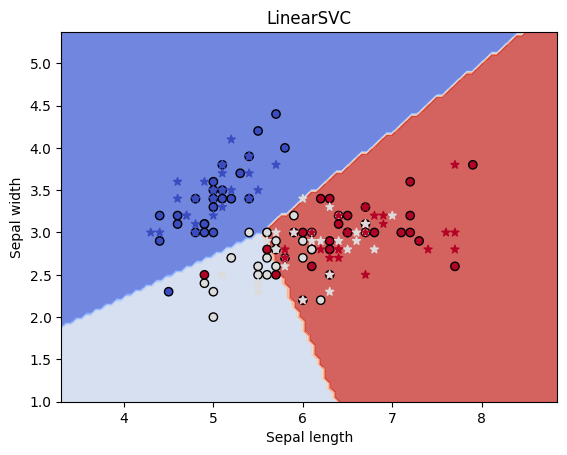

In [9]:
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

## Question :

Testez differentes valeurs pour le paramètre C. Comment la frontière de décision évolue en fonction de C ?

## Question

D’après la visualisation ci-dessus, ce modèle vous paraît-il adapté au problème ? Si non, que peut-on faire pour l’améliorer ?

## Correction

### Valeurs de  ***C*** faibles (ex : 0.01, 0.1) : 
Lorsque C est petit, le modèle accepte plus d'erreurs sur les points d'entraînement pour obtenir une frontière de décision plus simple. Cela signifie que la frontière de décision peut être plus éloignée de certains points, ce qui favorise une meilleure généralisation. Cependant, cela peut parfois nuire à la précision sur des jeux de données complexes.

### Valeurs de ***C*** élevées (ex : 10, 100) : 
Avec un C élevé, le modèle va pénaliser fortement les erreurs sur les données d’entraînement, ce qui rend la frontière de décision plus proche des points mal classés. Le modèle essaiera de séparer parfaitement les données d’entraînement, ce qui peut conduire à une frontière plus complexe et risquer un surapprentissage.

Pour l’instant, nous n’avons exploité que deux variables explicatives. Néanmoins, l’intérêt des machines à vecteur de support linéaires est qu’il est souvent plus facile de trouver des hyperplans séparateurs dans des espaces de grande dimension.

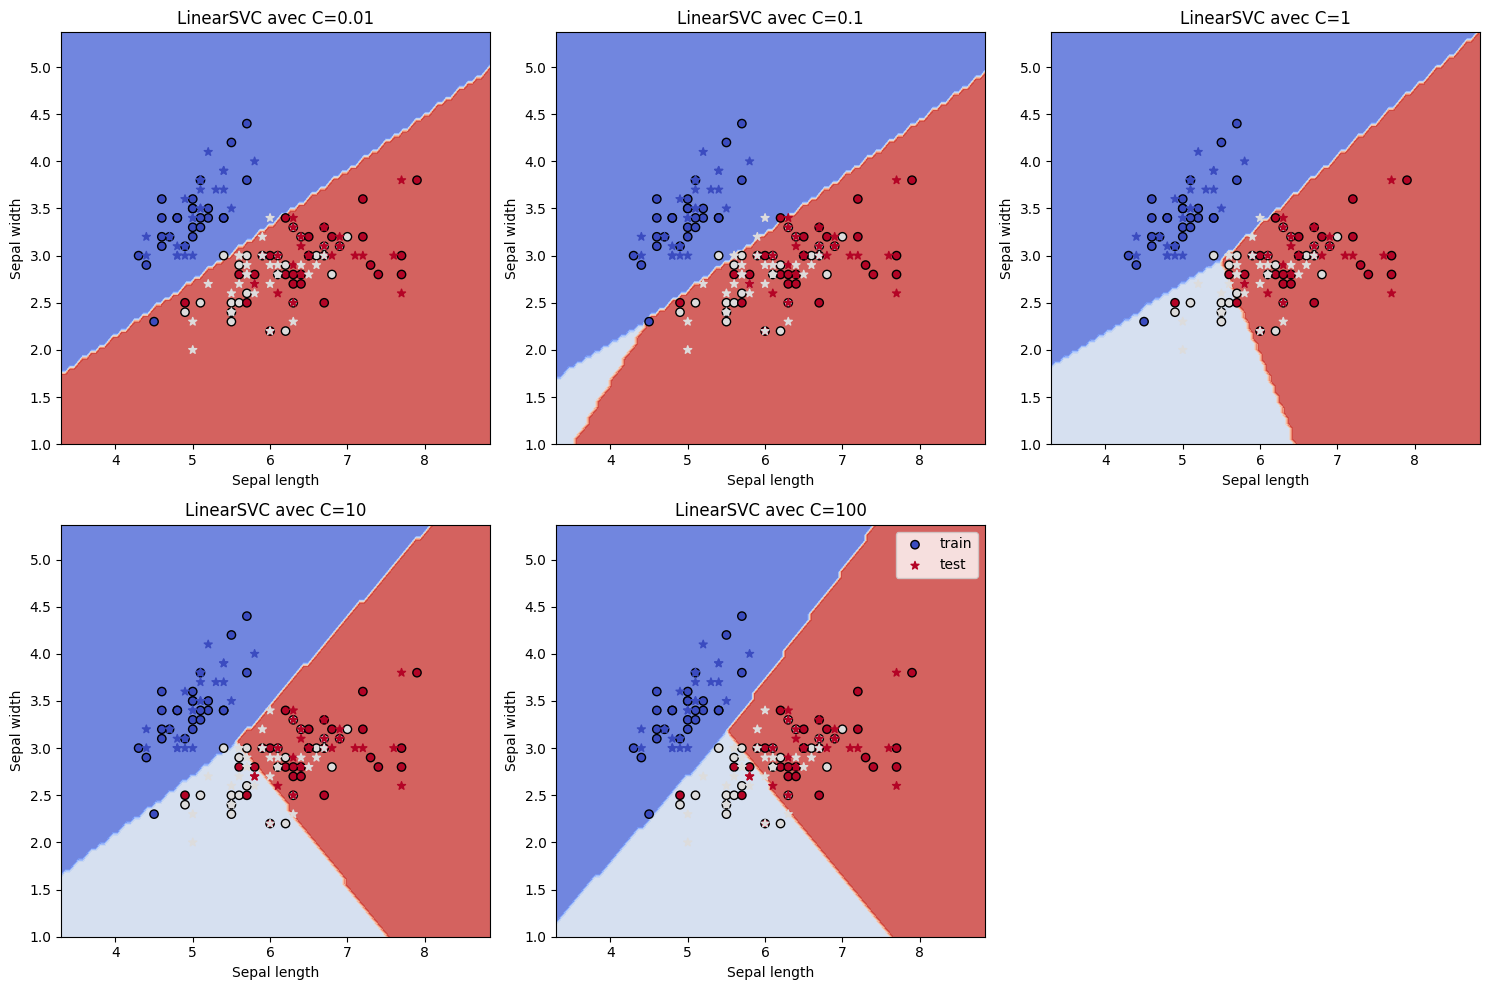

In [16]:

# Liste des différentes valeurs de C à tester
C_values = [0.01, 0.1, 1, 10, 100]

# Créer la figure pour afficher les résultats
plt.figure(figsize=(15, 10))

# Tester chaque valeur de C
for i, C in enumerate(C_values, 1):
    # Créer un modèle LinearSVC avec la valeur actuelle de C
    lin_svc = svm.LinearSVC(C=C)
    lin_svc.fit(X_train, y_train)

    # Définir les limites de la grille
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Prédire la classe pour chaque point de la grille
    Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Afficher la surface de décision
    plt.subplot(2, 3, i)  # Crée un sous-graphique pour chaque valeur de C
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Afficher les points d'entraînement et de test
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    
    # Ajouter des titres et des labels
    plt.title(f"LinearSVC avec C={C}")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

# Afficher la légende et le graphique
plt.legend()
plt.tight_layout()
plt.show()


## Question

Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire mais en utilisant les quatre attributs du jeu de données Iris. Le score de classification en test a-t-il augmenté ? Pourquoi ?

## Correction

In [17]:

# Liste de valeurs de C pour trouver la meilleure configuration
best_score = 0
best_C = None

# Entraînement et évaluation pour chaque valeur de C
for C in C_values:
    lin_svc = svm.LinearSVC(C=C, max_iter=10000, random_state=42)
    lin_svc.fit(X_train, y_train)
    score = lin_svc.score(X_test, y_test)
    print(f"Score de test pour C = {C} : {score:.2f}")
    
    # Mémoriser le meilleur score et le meilleur C
    if score > best_score:
        best_score = score
        best_C = C

print(f"Meilleure valeur de C : {best_C} avec un score de test de : {best_score:.2f}")


Score de test pour C = 0.01 : 0.63
Score de test pour C = 0.1 : 0.63
Score de test pour C = 1 : 0.71
Score de test pour C = 10 : 0.81
Score de test pour C = 100 : 0.81
Meilleure valeur de C : 10 avec un score de test de : 0.81


En utilisant les quatre caractéristiques (longueur et largeur des sépales et des pétales), le modèle a plus d'informations pour distinguer les différentes classes d'Iris. Les attributs des pétales sont particulièrement discriminants dans le jeu de données Iris, car ils différencient mieux les espèces que les dimensions des sépales seules.
Par conséquent, il est probable que le score de classification en test augmente par rapport à l’utilisation de seulement deux caractéristiques.


En utilisant toutes les caractéristiques, le modèle peut tracer une frontière de décision plus précise car il dispose d’informations supplémentaires qui rendent les classes plus facilement séparables. Les caractéristiques des pétales en particulier sont connues pour mieux séparer les trois classes d'espèces d'Iris dans l'espace des caractéristiques.

## Jeu de données Digits

Le jeu de données Digits est une collection d’images de chiffres manuscrits. Elles peuvent se charger directement depuis scikit-learn :

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

## Question :

Utilisez les données Digits pour construire un classifieur LinearSVC et évaluez-le. Si le temps d’apprentissage est trop long, sélectionnez une partie plus petite de la base d’apprentissage (par exemple 10000 échantillons). Pour quelle valeur de C on obtient le meilleurs résultats de généralisation ?

## Correction :

Utiliser la validation croisée avec `GridSearchCV`.

In [19]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score


# Diviser les données en ensembles d’entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Limiter le nombre d'échantillons d’entraînement si nécessaire
X_train, y_train = X_train[:1000], y_train[:1000]

# Définir la grille de paramètres pour C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialiser GridSearchCV avec LinearSVC et validation croisée 5-fold
grid_search = GridSearchCV(svm.LinearSVC(max_iter=10000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleurs paramètres et score de validation croisée
print(f"Meilleure valeur de C : {grid_search.best_params_['C']}")
print(f"Meilleur score de validation croisée : {grid_search.best_score_:.2f}")

# Évaluer le modèle optimisé sur le jeu de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
print(f"Score de précision sur le jeu de test : {test_score:.2f}")


Meilleure valeur de C : 0.01
Meilleur score de validation croisée : 0.95
Score de précision sur le jeu de test : 0.95


## Question

Refaites la classification de la base de données `iris` mais avec un noyau gaussien. Testez l’effet du paramètre d’échelle du noyau (`gamma`) et du paramètre de régularisation `C`.

In [21]:

# Définir la grille de paramètres pour C et gamma
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Initialiser GridSearchCV avec SVC (SVM avec noyau gaussien RBF) et validation croisée 5-fold
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleurs paramètres et score de validation croisée
print(f"Meilleure valeur de C : {grid_search.best_params_['C']}")
print(f"Meilleure valeur de gamma : {grid_search.best_params_['gamma']}")
print(f"Meilleur score de validation croisée : {grid_search.best_score_:.2f}")

# Évaluer le modèle optimisé sur le jeu de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
print(f"Score de précision sur le jeu de test : {test_score:.2f}")


Meilleure valeur de C : 10
Meilleure valeur de gamma : 0.001
Meilleur score de validation croisée : 0.99
Score de précision sur le jeu de test : 0.99


## Question

Que constatez-vous par rapport a la SVM linéaire ?


Les résultats montrent qu'avec un noyau gaussien (RBF), le SVM atteint une précision de 99 % aussi bien en validation croisée qu'en test, ce qui est supérieur à la précision obtenue avec le SVM linéaire.

## Jeu de données Digits

Reprenons notre base de données Digits de chiffres manuscrits.

## Question

Réalisez une classification par une SVM linéaire et une SVM à noyau gaussien du jeu de données Digits.
Comment est choisi le paramètre `gamma` dans scikit-learn ? Testez différentes valeurs de ce paramètre pour évaluer son influence. En particulier, testez les paramètres `gamma='auto'` et `gamma='scale'`. À quoi correspondent-ils ?

`gamma='scale'` : Tendance à bien généraliser car il est calculé en fonction de la variance des données, s'adaptant donc mieux aux caractéristiques de Digits.
`gamma='auto'` : Moins adaptatif, ce qui peut mener à des performances moins optimales dans certains cas.
Valeurs spécifiques de gamma : Des valeurs très faibles (ex. 0.001) peuvent rendre le modèle trop simple, tandis que des valeurs élevées (ex. 1) peuvent le rendre trop complexe, risquant ainsi de surapprendre.


In [22]:

# SVM linéaire pour référence
lin_svc = svm.LinearSVC(C=1.0, max_iter=10000, random_state=42)
lin_svc.fit(X_train, y_train)
y_pred_lin = lin_svc.predict(X_test)
score_lin = accuracy_score(y_test, y_pred_lin)
print(f"Précision du SVM linéaire : {score_lin:.2f}")

# SVM avec noyau gaussien (RBF) et différentes valeurs de gamma
print("\nSVM avec noyau gaussien (RBF) et différentes valeurs de gamma :")

for gamma in ['auto', 'scale', 0.001, 0.01, 0.1, 1]:
    rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=1.0, random_state=42)
    rbf_svc.fit(X_train, y_train)
    y_pred_rbf = rbf_svc.predict(X_test)
    score_rbf = accuracy_score(y_test, y_pred_rbf)
    print(f"Gamma = {gamma}, Précision : {score_rbf:.2f}")


Précision du SVM linéaire : 0.93

SVM avec noyau gaussien (RBF) et différentes valeurs de gamma :
Gamma = auto, Précision : 0.39
Gamma = scale, Précision : 0.97
Gamma = 0.001, Précision : 0.99
Gamma = 0.01, Précision : 0.70
Gamma = 0.1, Précision : 0.09
Gamma = 1, Précision : 0.09


## Question :

Réalisez une analyse en composante principale (ACP) et gardez les 2 premières composantes principales (voir la [documentation Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)). Ensuite faites une classification avec un noyau gaussien et affichez les points de test ainsi que la surface de décision (reprendre le code de la SVM linéaire). Comparez avec une SVM linéaire.

Précision du SVM linéaire : 0.63
Précision du SVM à noyau gaussien (RBF) : 0.66


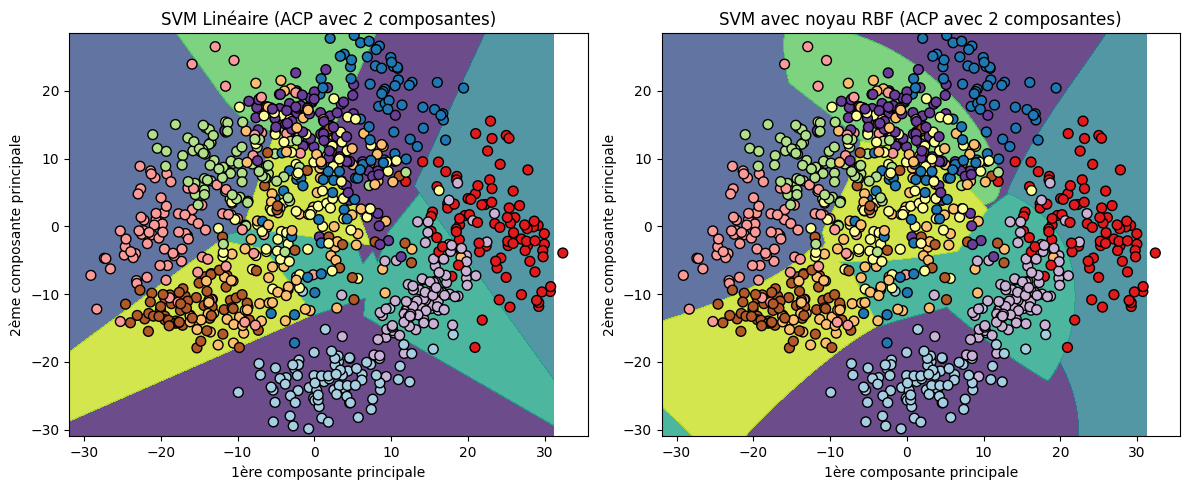

In [25]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# 1. Réaliser une ACP et garder les 2 premières composantes principales
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 2. Classification avec un SVM linéaire
lin_svc = svm.SVC(kernel='linear', C=1.0, random_state=42)
lin_svc.fit(X_train_pca, y_train)
y_pred_lin = lin_svc.predict(X_test_pca)
score_lin = accuracy_score(y_test, y_pred_lin)
print(f"Précision du SVM linéaire : {score_lin:.2f}")

# 3. Classification avec un SVM à noyau gaussien (RBF)
rbf_svc = svm.SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
rbf_svc.fit(X_train_pca, y_train)
y_pred_rbf = rbf_svc.predict(X_test_pca)
score_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Précision du SVM à noyau gaussien (RBF) : {score_rbf:.2f}")

# 4. Afficher la surface de décision pour le SVM linéaire
plt.figure(figsize=(12, 5))

# Tracer la surface de décision du SVM linéaire
plt.subplot(1, 2, 1)
h = .02  # taille de la grille
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='o', s=50, cmap=plt.cm.Paired)
plt.title("SVM Linéaire (ACP avec 2 composantes)")
plt.xlabel('1ère composante principale')
plt.ylabel('2ème composante principale')

# 5. Afficher la surface de décision pour le SVM à noyau gaussien (RBF)
plt.subplot(1, 2, 2)
Z_rbf = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
plt.contourf(xx, yy, Z_rbf, alpha=0.8)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='o', s=50, cmap=plt.cm.Paired)
plt.title("SVM avec noyau RBF (ACP avec 2 composantes)")
plt.xlabel('1ère composante principale')
plt.ylabel('2ème composante principale')

plt.tight_layout()
plt.show()


## Question

Réalisez une recherche par grille afin de déterminer sur le jeu de données Digits complet (sans l’ACP) :

- le meilleur noyau à utiliser,  
- la meilleure valeure de `C`,  
- la meilleure valeur de `gamma` (ou le degré du polynome pour un noyau polynomial).  
- (optionnel) la meilleure valeur de `n_components` de l’ACP  

In [26]:

# Paramètres pour la recherche par grille
param_grid = {
    'C': [0.1, 1, 10, 100],  # Valeurs de C
    'kernel': ['linear', 'rbf', 'poly'],  # Différents noyaux
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Valeurs de gamma
    'degree': [3, 4, 5],  # Degré pour le noyau polynomial
}

# GridSearch avec SVM
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés par la recherche par grille
print(f"Meilleurs paramètres : {grid_search.best_params_}")

# Précision sur le jeu de test avec les meilleurs paramètres
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Précision sur le jeu de test : {score:.2f}")


# Définir une grille de valeurs pour n_components
pca_param_grid = {
    'pca__n_components': [10, 20, 30, 40, 50]  # Nombre de composantes principales à tester
}

# Création d'un pipeline avec ACP + SVM
from sklearn.pipeline import Pipeline
pca_svm_pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', svm.SVC())
])

# Recherche par grille avec ACP + SVM
grid_search_pca = GridSearchCV(pca_svm_pipeline, pca_param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_pca.fit(X_train, y_train)

# Meilleur nombre de composants pour l'ACP
print(f"Meilleur nombre de composants pour l'ACP : {grid_search_pca.best_params_['pca__n_components']}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Meilleurs paramètres : {'C': 10, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}
Précision sur le jeu de test : 0.99
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Meilleur nombre de composants pour l'ACP : 40


## Question

Combien de composantes faut-il garder au minimum dans l’ACP pour classer correctement au moins 97% des images ? À quel facteur de réduction de dimension cela correspond-il ?

In [27]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# Charger les données Digits
digits = load_digits()
X = digits.data

# Appliquer l'ACP
pca = PCA()
pca.fit(X)

# Calcul de la variance expliquée cumulée
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Trouver le nombre de composantes nécessaires pour expliquer au moins 97% de la variance
n_components_needed = np.argmax(explained_variance >= 0.97) + 1
print(f"Nombre de composantes nécessaires pour expliquer 97% de la variance : {n_components_needed}")

# Calcul du facteur de réduction de dimension
initial_dim = X.shape[1]  # Nombre de caractéristiques initiales 
reduction_factor = initial_dim / n_components_needed
print(f"Facteur de réduction de dimension : {reduction_factor:.2f}")


Nombre de composantes nécessaires pour expliquer 97% de la variance : 34
Facteur de réduction de dimension : 1.88
